Solved Steinhart-Hart coefficients:
A = 1.948598e-03
B = 9.122669e-04
C = -1.704494e-04


C:\Users\Brayden\AppData\Local\Temp\ipykernel_16716\2886743423.py:26: RuntimeWarning: invalid value encountered in power
  return np.exp(((x - (y/2))**(1/3)) - ((x + (y/2))**(1/3)))


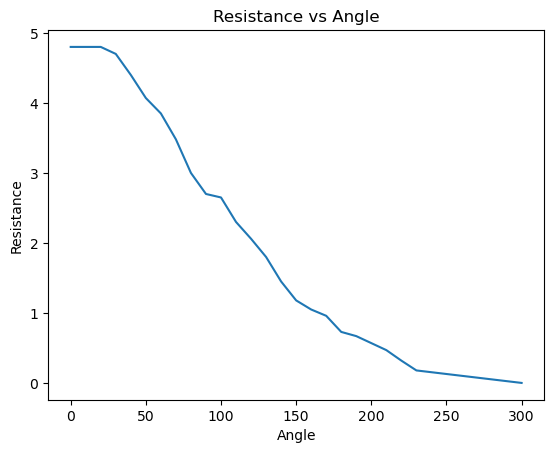

In [7]:
import numpy as np
import matplotlib.pyplot as plt

resistance = np.array([4.8,4.8,4.8,4.7,4.4,4.07,3.85,3.48,3,2.7,2.65,2.3,2.06,1.8,1.45,1.18,1.05,0.96,0.73,0.67,0.57,0.47,0.32,0.18,0.0016])
angle = np.array([0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,300])

sample_resistance = np.array([2.65, 2.3, 2.06]) # resistance in Ohms
sample_temp = np.array([100, 110, 120]) + 273.15 # temp in Kelvin

# Solving for A, B, and C
Y = 1 / sample_temp
L = np.log(sample_resistance)
M = L**3

# Set up and Solve Linear System Using Matrices 
X = np.vstack([np.ones(len(Y)), L, M]).T
params_stein = np.linalg.lstsq(X, Y, rcond=None)[0]
A, B, C = params_stein

print(f"Solved Steinhart-Hart coefficients:\nA = {A:.6e}\nB = {B:.6e}\nC = {C:.6e}")

# Compute Resistance using parameters
def steinhart_hart_equation(T):
    y = (A - (1/(T + 273.151))) / C
    x = np.sqrt(((B / (3*C))**3) + ((y**2) / 4))
    return np.exp(((x - (y/2))**(1/3)) - ((x + (y/2))**(1/3)))

steinhart_hart_resistance = steinhart_hart_equation(resistance)

# Plot the temperature
plt.plot(angle,resistance)
plt.xlabel('Angle')
plt.ylabel('Resistance')
plt.title('Resistance vs Angle')
plt.show()